In [1]:
import numpy as np
import matplotlib.pyplot as plt
import composite as cp
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
layer1 = cp.layer(name = 'glass_epoxy')
layer1.get_status()
layer1.set_angle_degree(45)
layer1.get_status()

name:	glass_epoxy
t:	 0.000125
angle:	 0
Q:	 [[5.59681305e+10 4.67252184e+09 0.00000000e+00]
 [4.67252184e+09 1.86900874e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.10000000e+09]]
S:	 [[ 1.82481752e-11 -4.56204380e-12  0.00000000e+00]
 [-4.56204380e-12  5.46448087e-11  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.09890110e-10]]
Q_:	 [[5.59681305e+10 4.67252184e+09 0.00000000e+00]
 [4.67252184e+09 1.86900874e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.10000000e+09]]
S_:	 [[ 1.82481752e-11 -4.56204380e-12  0.00000000e+00]
 [-4.56204380e-12  5.46448087e-11  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.09890110e-10]]
name:	glass_epoxy
t:	 0.000125
angle:	 0.7853981633974483
Q:	 [[5.59681305e+10 4.67252184e+09 0.00000000e+00]
 [4.67252184e+09 1.86900874e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.10000000e+09]]
S:	 [[ 1.82481752e-11 -4.56204380e-12  0.00000000e+00]
 [-4.56204380e-12  5.46448087e-11  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e

# 2.分析X方向加载复合材料弹性模量随θ变化曲线

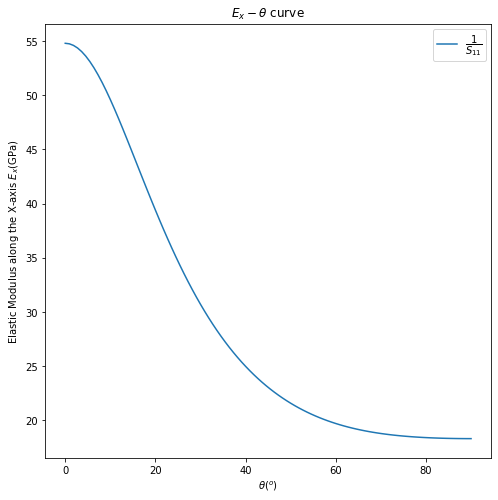

In [3]:
layer1 = cp.layer(name = 'glass_epoxy')
Q_list = []
S_list = []
angle_list = np.linspace(0,180/2,100)
for i in angle_list:
    layer1.set_angle_degree(i)
    Q_list.append(layer1.Q_[0,0]/1e9)  # use Q11
    S_list.append(1/layer1.S_[0,0]/1e9)  # use 1/S11
    pass
# 下面是绘图部分
fig = plt.figure(figsize = (8,8))  # 设置画布大小

# plt.plot(angle_list,Q_list,label = '$Q_{11}$')  # use Q11
plt.plot(angle_list,S_list,label = '$\\dfrac{1}{S_{11}}$')  # use 1/S11
ax1 = plt.gca()
ax1.set_title('$E_x-\\theta$ curve')  # 设置标题
ax1.set_xlabel('$\\theta$($^o$)')  # 设置x轴
ax1.set_ylabel('Elastic Modulus along the X-axis $E_x$(GPa)')  # 设置y轴
plt.legend()  # 显示图例

# 3.给出X方向加载不同θ应力应变曲线

## 3.1 $\varepsilon_x-\sigma_x$ curve in different $\theta$

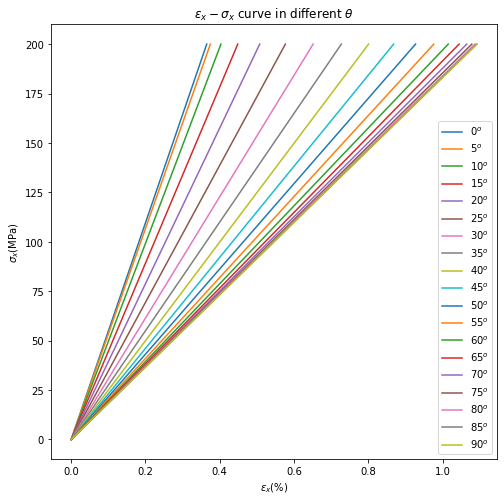

In [4]:
fig = plt.figure(figsize = (8,8))  # 设置画布大小

for angle in np.linspace(0,90,19):
    layer1 = cp.layer(name = 'glass_epoxy')
    layer1.set_angle_degree(angle)
    S_11,S_12,S_13 = layer1.S_[0,0],layer1.S_[1,0],layer1.S_[2,0]
    sigma_x = np.linspace(0,2e8,100)
    epsilon_x = S_11 * sigma_x

    # 下面是绘图部分
    plt.plot(epsilon_x*100, sigma_x/1e6, label = str(int(angle))+'$^o$')


ax1 = plt.gca()
ax1.set_title('$\\varepsilon_x-\sigma_x$ curve in different $\\theta$')  # 设置标题
ax1.set_xlabel('$\\varepsilon_x$(%)')  # 设置x轴
ax1.set_ylabel('$\sigma_x$(MPa)')  # 设置y轴
plt.legend()  # 显示图例

Text(0.5, 0, '$\\varepsilon_x$(%)')

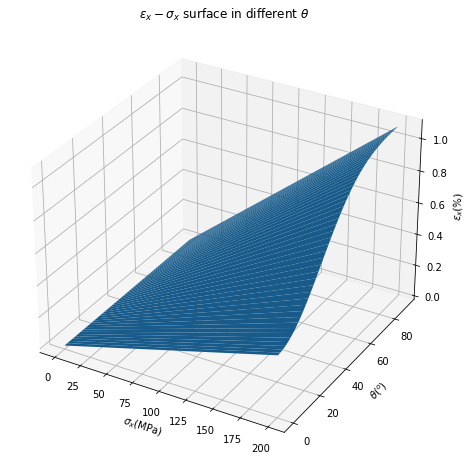

In [5]:
layer1 = cp.layer(name = 'glass_epoxy')
angle_list = np.linspace(0,90,99)
S_11_list = np.array([])
for angle in angle_list:
    layer1.set_angle_degree(angle)
    S_11_list = np.append(S_11_list, layer1.S_[0,0])


# 3d坐标网格化部分
sigma_x = np.linspace(0,2e8,2)
_, angle_list1 = np.meshgrid(sigma_x, angle_list)
sigma_x1, S_11_list1 = np.meshgrid(sigma_x, S_11_list)
epsilon_x = S_11_list1 * sigma_x1


# 3d绘图部分
fig = plt.figure(figsize = (8,8))
fig = plt.axes(projection = '3d')
fig.plot_surface(sigma_x1/1e6, angle_list1, epsilon_x*100)
fig.set_title('$\\varepsilon_x-\sigma_x$ surface in different $\\theta$')
fig.set_xlabel('$\sigma_x$(MPa)')
fig.set_ylabel('$\\theta$($^o$)')
fig.set_zlabel('$\\varepsilon_x$(%)')

## 3.2 $\varepsilon_y-\sigma_x$ curve in different $\theta$

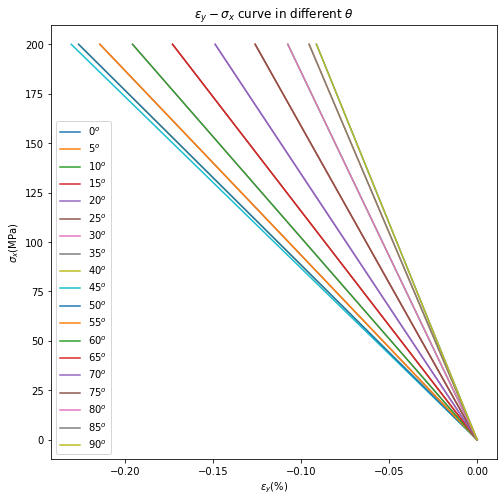

In [6]:
fig = plt.figure(figsize = (8,8))  # 设置画布大小

for angle in np.linspace(0,90,19):
    layer1 = cp.layer(name = 'glass_epoxy')
    layer1.set_angle_degree(angle)
    S_11,S_12,S_13 = layer1.S_[0,0],layer1.S_[1,0],layer1.S_[2,0]
    sigma_x = np.linspace(0,2e8,100)
    epsilon_y = S_12 * sigma_x

    # 下面是绘图部分
    plt.plot(epsilon_y*100, sigma_x/1e6, label = str(int(angle))+'$^o$')


ax1 = plt.gca()
ax1.set_title('$\\varepsilon_y-\sigma_x$ curve in different $\\theta$')  # 设置标题
ax1.set_xlabel('$\\varepsilon_y$(%)')  # 设置x轴
ax1.set_ylabel('$\sigma_x$(MPa)')  # 设置y轴
plt.legend()  # 显示图例

Text(0.5, 0, '$\\varepsilon_y$(%)')

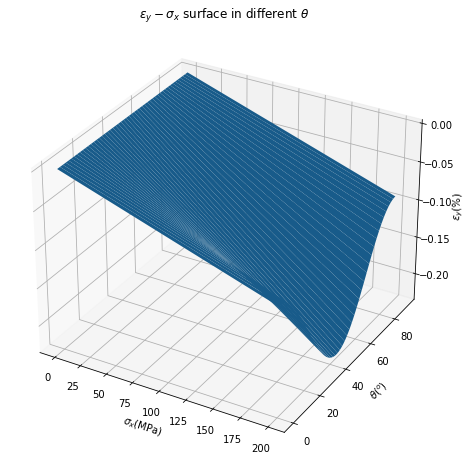

In [7]:
layer1 = cp.layer(name = 'glass_epoxy')
angle_list = np.linspace(0,90,99)
S_12_list = np.array([])
for angle in angle_list:
    layer1.set_angle_degree(angle)
    S_12_list = np.append(S_12_list, layer1.S_[1,0])


# 3d坐标网格化部分
sigma_x = np.linspace(0,2e8,2)
_, angle_list1 = np.meshgrid(sigma_x, angle_list)
sigma_x1, S_11_list1 = np.meshgrid(sigma_x, S_12_list)
epsilon_x = S_11_list1 * sigma_x1


# 3d绘图部分
fig = plt.figure(figsize = (8,8))
fig = plt.axes(projection = '3d')
fig.plot_surface(sigma_x1/1e6, angle_list1, epsilon_x*100)
fig.set_title('$\\varepsilon_y-\sigma_x$ surface in different $\\theta$')
fig.set_xlabel('$\sigma_x$(MPa)')
fig.set_ylabel('$\\theta$($^o$)')
fig.set_zlabel('$\\varepsilon_y$(%)')

## 3.3 $\gamma_{xy}-\sigma_x$ curve in different $\theta$

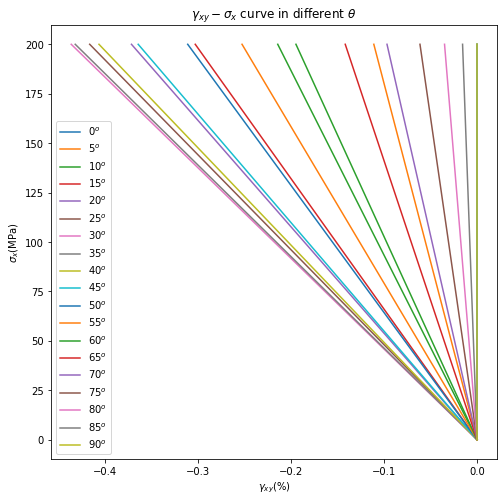

In [8]:
fig = plt.figure(figsize = (8,8))  # 设置画布大小

for angle in np.linspace(0,90,19):
    layer1 = cp.layer(name = 'glass_epoxy')
    layer1.set_angle_degree(angle)
    S_11,S_12,S_13 = layer1.S_[0,0],layer1.S_[1,0],layer1.S_[2,0]
    sigma_x = np.linspace(0,2e8,100)
    epsilon_z = S_13 * sigma_x

    # 下面是绘图部分
    plt.plot(epsilon_z*100, sigma_x/1e6, label = str(int(angle))+'$^o$')


ax1 = plt.gca()
ax1.set_title('$\gamma_{xy}-\sigma_x$ curve in different $\\theta$')  # 设置标题
ax1.set_xlabel('$\gamma_{xy}$(%)')  # 设置x轴
ax1.set_ylabel('$\sigma_x$(MPa)')  # 设置y轴
plt.legend()  # 显示图例

Text(0.5, 0, '$\\gamma_{xy}$(%)')

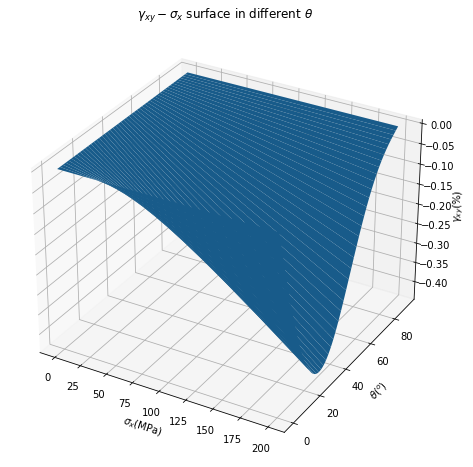

In [9]:
layer1 = cp.layer(name = 'glass_epoxy')
angle_list = np.linspace(0,90,99)
S_13_list = np.array([])
for angle in angle_list:
    layer1.set_angle_degree(angle)
    S_13_list = np.append(S_13_list, layer1.S_[2,0])


# 3d坐标网格化部分
sigma_x = np.linspace(0,2e8,2)
_, angle_list1 = np.meshgrid(sigma_x, angle_list)
sigma_x1, S_11_list1 = np.meshgrid(sigma_x, S_13_list)
epsilon_x = S_11_list1 * sigma_x1


# 3d绘图部分
fig = plt.figure(figsize = (8,8))
fig = plt.axes(projection = '3d')
fig.plot_surface(sigma_x1/1e6, angle_list1, epsilon_x*100)
fig.set_title('$\gamma_{xy}-\sigma_x$ surface in different $\\theta$')
fig.set_xlabel('$\sigma_x$(MPa)')
fig.set_ylabel('$\\theta$($^o$)')
fig.set_zlabel('$\gamma_{xy}$(%)')

# 4. 给出X方向和Y方向同时加载不同θ应力应变曲线

## 4.1 X方向和Y方向同步加载

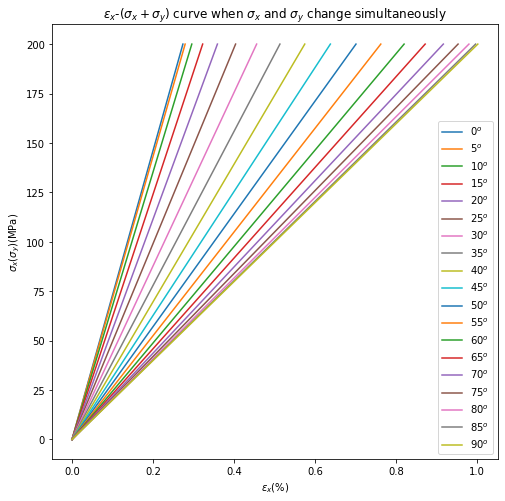

In [10]:
fig = plt.figure(figsize = (8,8))  # 设置画布大小

for angle in np.linspace(0,90,19):
    layer1 = cp.layer(name = 'glass_epoxy')
    layer1.set_angle_degree(angle)
    S_11,S_12,S_13 = layer1.S_[0,0],layer1.S_[1,0],layer1.S_[2,0]
    sigma_x, sigma_y = np.linspace(0,2e8,100), np.linspace(0,2e8,100)
    epsilon_x = S_11 * sigma_x + S_12 * sigma_y

    # 下面是绘图部分
    plt.plot(epsilon_x*100, sigma_x/1e6, label = str(int(angle))+'$^o$')


ax1 = plt.gca()
ax1.set_title('$\\varepsilon_x$-($\sigma_x+\sigma_y$) curve when $\sigma_x$ and $\sigma_y$ change simultaneously')  # 设置标题
ax1.set_xlabel('$\\varepsilon_x$(%)')  # 设置x轴
ax1.set_ylabel('$\sigma_x$($\sigma_y$)(MPa)')  # 设置y轴
plt.legend()  # 显示图例

## 4.2 特定角度($\theta=45^o$)X方向和Y方向不同步加载

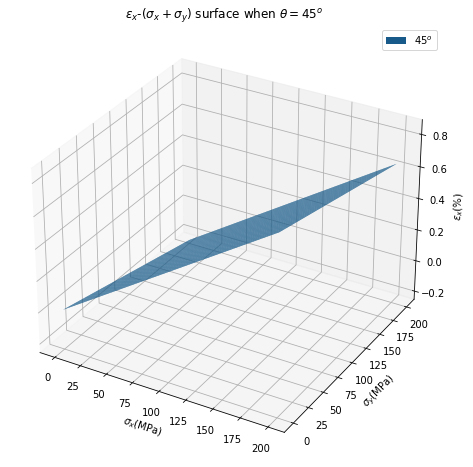

In [11]:
layer1 = cp.layer(name = 'glass_epoxy')
fig = plt.figure(figsize = (8,8))  # 设置画布大小
ax = plt.gca(projection = '3d')  # 绘制3d图

angle = 45
layer1 = cp.layer(name = 'glass_epoxy')
layer1.set_angle_degree(angle)
S_11,S_12 = layer1.S_[0,0],layer1.S_[1,0]
sigma_x = np.linspace(0,2e8,99)
sigma_y = np.linspace(0,2e8,99)

# 3d绘图数据网格化
sigma_x, sigma_y = np.meshgrid(sigma_x, sigma_y)
epsilon_x = S_11 * sigma_x + S_12 * sigma_y
surf = ax.plot_surface(sigma_x/1e6, sigma_y/1e6, epsilon_x*100, label = str(angle)+'$^o$')
surf._facecolors2d=surf._facecolor3d  # debug
surf._edgecolors2d=surf._edgecolor3d  # debug
# There is a bug in matplotlib.py, which can be solve on "https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d/54994985"

ax.set_title('$\\varepsilon_x$-($\sigma_x+\sigma_y$) surface when $\\theta=45^o$')
ax.set_xlabel('$\sigma_x$(MPa)')
ax.set_ylabel('$\sigma_y$(MPa)')
ax.set_zlabel('$\\varepsilon_x$(%)')
ax.legend()

## 4.3 非特定角度X方向和Y方向不同步加载

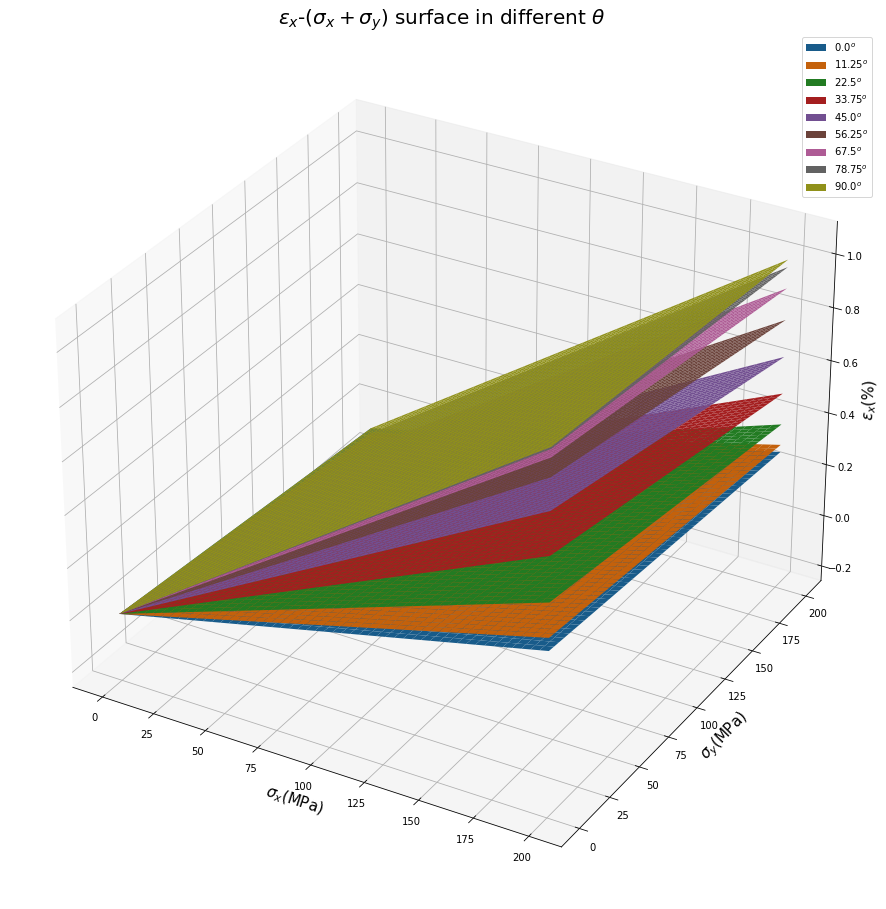

In [12]:
layer1 = cp.layer(name = 'glass_epoxy')
fig = plt.figure(figsize = (16,16))  # 设置画布大小
ax = plt.gca(projection = '3d')  # 绘制3d图
font_title = {
    'size': 20
}
font_label = {
    'size': 15
}

for angle in np.linspace(0,90,9):
    layer1 = cp.layer(name = 'glass_epoxy')
    layer1.set_angle_degree(angle)
    S_11,S_12 = layer1.S_[0,0],layer1.S_[1,0]
    sigma_x = np.linspace(0,2e8,99)
    sigma_y = np.linspace(0,2e8,99)

    # 3d绘图数据网格化
    sigma_x, sigma_y = np.meshgrid(sigma_x, sigma_y)
    epsilon_x = S_11 * sigma_x + S_12 * sigma_y
    surf = ax.plot_surface(sigma_x/1e6, sigma_y/1e6, epsilon_x*100, label = str(angle)+'$^o$')
    surf._facecolors2d=surf._facecolor3d  # debug
    surf._edgecolors2d=surf._edgecolor3d  # debug
    # There is a bug in matplotlib.py, which can be solve on "https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d/54994985"

ax.set_title('$\\varepsilon_x$-($\sigma_x+\sigma_y$) surface in different $\\theta$', fontdict= font_title)
ax.set_xlabel('$\sigma_x$(MPa)', fontdict= font_label)
ax.set_ylabel('$\sigma_y$(MPa)', fontdict= font_label)
ax.set_zlabel('$\\varepsilon_x$(%)', fontdict= font_label)
ax.legend()


# 6. 层板理论
## 6.0 层板理论简述
基于经典层合板理论，层合板的内力-变形关系如式(6-1)(6-2)所示：

$$
\left[\begin{array}{c}
N_{x} \\
N_{y} \\
N_{x y}
\end{array}\right]=\left[\begin{array}{lll}
A_{11} & A_{12} & A_{16} \\
A_{12} & A_{22} & A_{26} \\
A_{16} & A_{26} & A_{66}
\end{array}\right]\left[\begin{array}{c}
\varepsilon_{x}^{0} \\
\varepsilon_{y}^{0} \\
\gamma_{x y}^{0}
\end{array}\right]+\left[\begin{array}{ccc}
B_{11} & B_{12} & B_{16} \\
B_{12} & B_{22} & B_{26} \\
B_{16} & B_{26} & B_{66}
\end{array}\right]\left[\begin{array}{l}
\kappa_{x} \\
\kappa_{y} \\
\kappa_{x y}
\end{array}\right]
\tag{6-1}
$$

$$
\left[\begin{array}{l}
M_{x} \\
M_{y} \\
M_{x y}
\end{array}\right]=\left[\begin{array}{lll}
B_{11} & B_{12} & B_{16} \\
B_{12} & B_{22} & B_{26} \\
B_{16} & B_{26} & B_{66}
\end{array}\right]\left[\begin{array}{c}
\varepsilon_{x}^{0} \\
\varepsilon_{y}^{0} \\
\gamma_{x y}^{0}
\end{array}\right]+\left[\begin{array}{ccc}
D_{11} & D_{12} & D_{16} \\
D_{12} & D_{22} & D_{26} \\
D_{16} & D_{26} & D_{66}
\end{array}\right]\left[\begin{array}{c}
\kappa_{x} \\
\kappa_{y} \\
\kappa_{x y}
\end{array}\right]
\tag{6-2}
$$

其中：

$$
\left.\begin{array}{l}A_{ij}=\sum_{k=1}^{n} \bar{Q}_{i j}^{k}\left(h_{k}-h_{k-1}\right) \\B_{ij}=\frac{1}{2} \sum_{k=1}^{n} \bar{Q}_{i j}^{k}\left(h_{k}^{2}-h_{k-1}^{2}\right) \quad(i,j=1,2,6) \\D_{ij}=\frac{1}{3} \sum_{k=1}^{n} \bar{Q}_{ij}^{k}\left(h_{k}^{3}-h_{k-1}^{3}\right)\end{array}\right\}\tag{6-3}
$$

将式(6-1)和(6-2)合成，得到一般层合板广义力和广义中面应变之间的关系，即：

$$
\left[\begin{array}{c}
N \\
\hdashline M
\end{array}\right]=\left[\begin{array}{c:c}
A & B \\
\hdashline B & D
\end{array}\right]\left[\begin{array}{l}
\varepsilon^{0} \\
\hdashline\kappa
\end{array}\right]
\tag{6-4}
$$

对式(6-4)进行逆运算，得层合板的变形-内力关系：

$$
\left[\begin{array}{c}
\varepsilon^{0} \\
\hdashline\kappa
\end{array}\right]=\left[\begin{array}{c:c}
a & b \\
\hdashline c & d
\end{array}\right]\left[\begin{array}{c}
N \\
\hdashline M
\end{array}\right]
\tag{6-5}
$$

其中：

$$
\left.\begin{array}{l}
a=A^{-1}-B^{*} D^{*-1} C^{*} \\
b=B^{*} D^{*-1} \\
c=-D^{*-1} C^{*} \\
d=D^{*-1}
\end{array}\right\}
\tag{6-6}
$$

$$
\begin{aligned}
&B^{*}=-A^{-1} B \\
&C^{*}=B A^{-1} \\
&D^{*}=D-B A^{-1} B
\end{aligned}
\tag{6-7}
$$


## 6.1 代码验证
取《复合材料力学》(西北工业大学出版社 矫桂琼著)P84~P86例4.7，计算结果与例题结果相同，可证明代码计算结果准确无误。

In [13]:
A = cp.layer(name='HT3/5224')
A.set_by_E(140,8.6,0.35,5.0)  # 这里单位是GPa
A.set_angle_degree(+45)
B = cp.layer(name='HT3/5224')
B.set_by_E(140,8.6,0.35,5.0)
B.set_angle_degree(-45)
C = cp.layer(name='HT3/5224')
C.set_by_E(140,8.6,0.35,5.0)
C.set_angle_degree(0)

layer_list = [A,B,C,C]
comp = cp.compound(layer_list=layer_list,status='S')
print(comp.strain_cal(0,0,0,20,0,0))
print(comp.strain_cal(0,0,0,20,0,0,outermost=True))

[[-8.31144732e-20]
 [ 5.84196226e-20]
 [ 0.00000000e+00]
 [ 7.26588209e+00]
 [-5.40097012e+00]
 [-5.41660356e-01]]
[[[ 0.00363294]
  [-0.00270049]
  [-0.00027083]]]


## 6.2 层合板性能分析
容易发现，$[\pm 45^o]_T$铺层的层合板各个方向性能更为均匀，而$[0]_S$铺层的层合板沿纤维方向性能优越，垂直纤维方向性能较差。

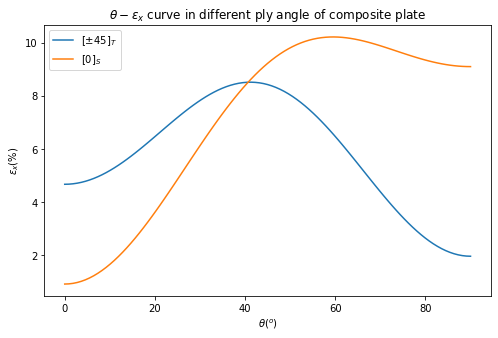

In [14]:
fig = plt.figure(figsize = (8,5))  # 设置画布大小
Mx = 20
epsilon_x1, epsilon_x2 = np.array([]),np.array([])
for angle in np.linspace(0,90,99):
    layer1 = cp.layer(name='boron_epoxy')
    layer1.set_angle_degree(angle)
    layer2 = cp.layer(name='boron_epoxy')
    layer2.set_angle_degree(angle-90)

    comp1 = cp.compound([layer1,layer2],status='T')
    comp2 = cp.compound([layer1],status='S')

    epsilon_x1 = np.append(epsilon_x1, comp1.strain_cal(Mx=Mx,outermost=True)[0,0,0])
    epsilon_x2 = np.append(epsilon_x2, comp2.strain_cal(Mx=Mx,outermost=True)[0,0,0])

angle = np.linspace(0,90,99)

plt.plot(angle, epsilon_x1*100, label = '$[\pm 45]_T$')
plt.plot(angle, epsilon_x2*100, label = '$[0]_S$')

ax1 = plt.gca()
ax1.set_title('$\\theta-\\varepsilon_x$ curve in different ply angle of composite plate')  # 设置标题
ax1.set_xlabel('$\\theta$($^o$)')  # 设置x轴
ax1.set_ylabel('$\\varepsilon_x$(%)')  # 设置y轴
plt.legend()  # 显示图例
